In [1]:
# Задание 1
# На основании датасета для каждого покупателя получите:
# •	предпочитаемый метод оплаты; 
# •	общие траты;
# •	количество денег, потраченных на дополнительные услуги и аксессуары. 

import pandas as pd

df = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv", date_format='%Y-%m-%d', parse_dates=['Purchase Date'])

df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [2]:
# 1.1 На основании датасета для каждого покупателя получите предпочитаемый метод оплаты
preferred_payment_method_df = df[df["Order Status"] != "Cancelled"][["Customer ID", "Payment Method", "Total Price"]].groupby(
    ["Customer ID", "Payment Method"]
).agg(
    {"Total Price": ['count', 'sum']}
).sort_values(
    ["Customer ID", ("Total Price", "count"), ("Total Price", "sum")],
    ascending=[True, False, False]
).groupby(["Customer ID"]).cumcount()

preferred_payment_method_df = (preferred_payment_method_df == 0).reset_index(name="is_preferred")

preferred_payment_method_df = preferred_payment_method_df[preferred_payment_method_df.is_preferred][["Customer ID", "Payment Method"]].set_index("Customer ID")

preferred_payment_method_df

,Payment Method
Customer ID,
1000,Paypal
1002,Cash
1003,Cash
1004,Credit Card
1005,Paypal
...,...
19990,PayPal
19991,PayPal
19995,Credit Card


In [3]:
# 1.2 На основании датасета для каждого покупателя получите общие траты
totals_df = df[df["Order Status"] != "Cancelled"][["Customer ID", "Total Price", "Add-on Total"]]

totals_df["Total"] = totals_df["Total Price"] + totals_df["Add-on Total"]

totals_df = totals_df.groupby(["Customer ID"])["Total"].sum().reset_index().set_index("Customer ID")

totals_df

,Total
Customer ID,
1000,767.18
1002,5080.76
1003,77.06
1004,148.78
1005,11854.44
...,...
19990,9231.00
19991,12368.06
19995,5394.56


In [4]:
# 1.3 На основании датасета для каждого покупателя получите количество денег, потраченных на дополнительные услуги и аксессуары
addons_df = df[df["Order Status"] != "Cancelled"][["Customer ID", "Add-on Total"]].groupby(["Customer ID"])["Add-on Total"].sum().reset_index().set_index("Customer ID")

addons_df

,Add-on Total
Customer ID,
1000,26.09
1002,60.16
1003,35.56
1004,65.78
1005,75.33
...,...
19990,113.56
19991,0.00
19995,0.00


In [5]:
# Задание 2
# 1. На основании датасета получите доход:
# •	по каждому методу доставки, 
# •	по каждому типу продукта, 
# •	по дополнительным услугам за каждый месяц,
# •	по дополнительным услугам за каждый квартал. 
# 2. Отобразите полученные данные на графике.

In [6]:
# 2.1.1 На основании датасета получите доход по каждому методу доставки
shipping_type_df = df[df["Order Status"] != "Cancelled"][["Shipping Type", "Total Price"]].groupby(["Shipping Type"])["Total Price"].sum().sort_values()

shipping_type_df

Shipping Type
Express       5632093.35
Overnight     5887722.52
Same Day      8292376.50
Expedited     8430385.58
Standard     14387037.62
Name: Total Price, dtype: float64

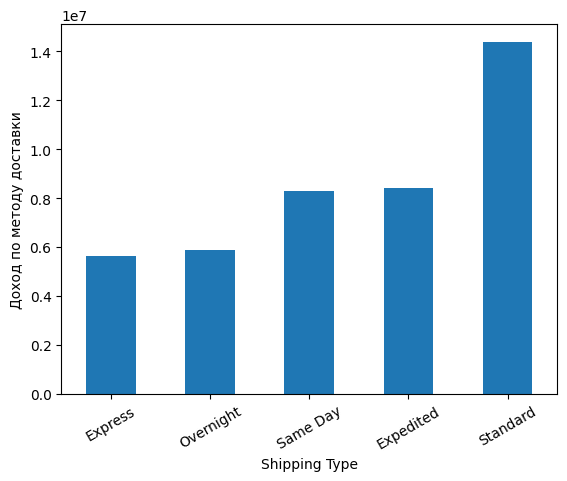

In [7]:
# 2.2.1 Отобразите полученные данные на графике
p = shipping_type_df.plot(kind="bar", ylabel="Доход по методу доставки")

p.tick_params(axis='x', rotation=30)

In [8]:
# 2.1.2 На основании датасета получите доход по каждому типу продукта
product_type_df = df[df["Order Status"] != "Cancelled"][["Product Type", "Total Price"]].groupby(["Product Type"])["Total Price"].sum().sort_values()

product_type_df

Product Type
Headphones     2734651.00
Tablet         7722632.25
Laptop         8365905.25
Smartwatch     9398591.23
Smartphone    14407835.84
Name: Total Price, dtype: float64

<Axes: ylabel='Доход по типу продукта'>

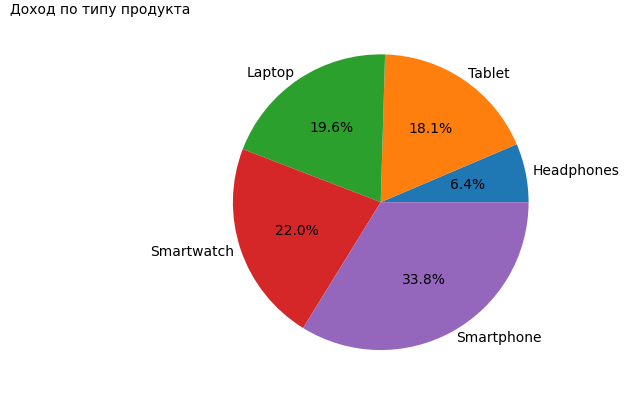

In [9]:
# 2.2.2 Отобразите полученные данные на графике
p = product_type_df.plot(kind="pie", labeldistance=1.05, autopct='%1.1f%%', pctdistance=.6)
p.set_ylabel('Доход по типу продукта', loc='top', rotation="horizontal")

p

In [10]:
# 2.1.3 На основании датасета получите доход по дополнительным услугам за каждый месяц

monthly_addons_df = df[df["Order Status"] != "Cancelled"][["Purchase Date", "Add-on Total"]]

monthly_addons_df['month'] = monthly_addons_df["Purchase Date"].dt.to_period("M")

monthly_addons_series = monthly_addons_df.groupby(["month"])["Add-on Total"].sum().sort_index()

monthly_addons_series

month
2023-09     5337.61
2023-10    26153.21
2023-11    24453.33
2023-12    22750.23
2024-01    93254.95
2024-02    80253.72
2024-03    84713.93
2024-04    82294.06
2024-05    89374.18
2024-06    84648.60
2024-07    88811.55
2024-08    87861.11
2024-09    65688.76
Freq: M, Name: Add-on Total, dtype: float64

<Axes: xlabel='Суммарный доход по дополнительным услугам за месяц'>

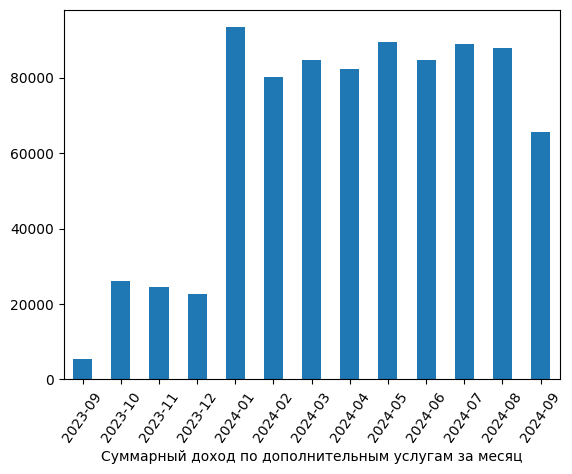

In [11]:
# 2.2.3 Отобразите полученные данные на графике
p = monthly_addons_series.plot(kind="bar")
p.set_xlabel('Суммарный доход по дополнительным услугам за месяц')
p.tick_params(axis='x', rotation=55)

p

In [12]:
# 2.1.4 На основании датасета получите доход по дополнительным услугам за каждый квартал

quarterly_addons_df = df[df["Order Status"] != "Cancelled"][["Purchase Date", "Add-on Total"]]

quarterly_addons_df['quarter'] = quarterly_addons_df["Purchase Date"].dt.to_period("Q")

quarterly_addons_series = quarterly_addons_df.groupby(["quarter"])["Add-on Total"].sum().sort_index()

quarterly_addons_series

quarter
2023Q3      5337.61
2023Q4     73356.77
2024Q1    258222.60
2024Q2    256316.84
2024Q3    242361.42
Freq: Q-DEC, Name: Add-on Total, dtype: float64

<Axes: xlabel='Суммарный доход по дополнительным услугам за квартал'>

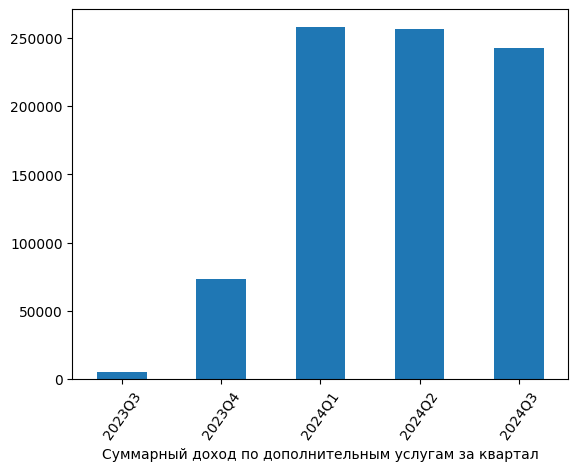

In [13]:
# 2.2.4 Отобразите полученные данные на графике
p = quarterly_addons_series.plot(kind="bar")
p.set_xlabel('Суммарный доход по дополнительным услугам за квартал')
p.tick_params(axis='x', rotation=55)

p